<h1>Desafio 1 - Properati</h1>

<h4>Índice</h4>
<a href='#section_1'>1. Carga y preparación del data set</a>

<a href='#section_2'>2. Análisis de la columna 'description'</a>


---
<a id='section_1'><h3>1. Carga y preparación del data set</h3></a>

In [1]:
import numpy as np
import pandas as pd
import re 
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [20]:
data= pd.read_csv("properati.csv")
data_describe = pd.DataFrame(round(data.isnull().sum() /data.shape[0],2), columns= ['Porcentaje de nulos'])
data_describe['type'] = data.dtypes
data_describe = data_describe[['type','Porcentaje de nulos']]
data_describe['nulos'] = data.isnull().sum()
values= []
example=[]
for x in data:
    values.append(len(data[x].unique()))
    example.append(data[x].unique())
    
data_describe['Valores distintos'] = values
data_describe['Ejemplos'] = example

pd.options.display.max_colwidth = 100
data_describe

columnasUtiles=   ['property_type','place_name','state_name','currency','price_aprox_usd',
                   'surface_total_in_m2','surface_covered_in_m2','price_usd_per_m2','price_usd_per_m2',
                   'rooms', 'expenses','description','title']

data_describe_utiles = data_describe.loc[columnasUtiles,:]
print("Columnas útiles: ",data_describe_utiles.shape[0],"de",data.shape[1])
display(data_describe)

Columnas útiles:  13 de 26


,type,Porcentaje de nulos,nulos,Valores distintos,Ejemplos
Unnamed: 0,int64,0.00,0,121220,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 2..."
operation,object,0.00,0,1,[sell]
property_type,object,0.00,0,4,"[PH, apartment, house, store]"
place_name,object,0.00,23,1061,"[Mataderos, La Plata, Liniers, Centro, Gualeguaychú, Munro, Belgrano, Rosario, Córdoba, San Migu..."
place_with_parent_names,object,0.00,0,1164,"[|Argentina|Capital Federal|Mataderos|, |Argentina|Bs.As. G.B.A. Zona Sur|La Plata|, |Argentina|..."
country_name,object,0.00,0,1,[Argentina]
state_name,object,0.00,0,28,"[Capital Federal, Bs.As. G.B.A. Zona Sur, Buenos Aires Costa Atlántica, Entre Ríos, Bs.As. G.B.A..."
geonames_id,float64,0.15,18717,647,"[3430787.0, 3432039.0, 3431333.0, 3435548.0, 3433657.0, 3430511.0, 3436077.0, 3838574.0, 3860259..."
lat-lon,object,0.43,51550,47204,"[-34.6618237,-58.5088387, -34.9038831,-57.9643295, -34.6522615,-58.5229825, -34.6477969,-58.5164..."
lat,float64,0.43,51550,46496,"[-34.6618237, -34.9038831, -34.6522615, -34.6477969, -38.0026256, -33.0140714, -34.5329567000000..."


In [33]:
data['price_usd_per_m2'].sample(10)

3087             NaN
88820    2069.448276
18576    3033.333333
87326    2000.000000
7558             NaN
49876    1853.333333
55283    2140.350877
23224    1315.000000
64205    1762.820513
21194    1000.000000
Name: price_usd_per_m2, dtype: float64

---
<a id='section_2'><h3>2. Análisis de la columna 'descripción'</h3></a>

Este análisis tiene como objetivo obtener información que no esté contemplada en ninguna de las columnas originales del data set  y que sea valiosa para la creación de un modelo que permitar estimar el precio por m2 de propiedades.  
    Se considerarons los siguientes atributos:  
1. Pileta  
2. Cochera  
3. Gimnasio  
4. Jacuzzi  
5. Terraza  
6. Barrio cerrado  
7. Quincho  
8. Tipo de departamento (interno, al frente o contrafrente)

In [3]:
#Preparación de la data y definición de funciones
pd.options.display.max_colwidth = 2000
data['description'] = data['description'].fillna("-")
data['description'] = data['description'].str.lower()
data['quintil'] = pd.qcut(data['price_aprox_usd'],5,labels=[1,2,3,4,5])

def chart_type(y_value):
    chart_pattern = pd.DataFrame(data[y_value].value_counts())
    chart_pattern[y_value+" (%)"] = round(pd.DataFrame(data[y_value].value_counts())/data[y_value].shape[0]*100,2)
    
    chart_property = (data.groupby('property_type')[y_value].sum()/data.groupby('property_type')[y_value].count())*100
    chart_property = pd.DataFrame(round(chart_property,2))
    chart_property =chart_property.reset_index()
    
    chart_quintil = (data.groupby('quintil')[y_value].sum()/data.groupby('quintil')[y_value].count())*100
    chart_quintil = pd.DataFrame(round(chart_quintil,2))
    chart_quintil =chart_quintil.reset_index()
    
    f, (ax1, ax2, ax3) = plt.subplots(1, 3)
    f.set_figwidth(12)
    f.set_figheight(4.5)
    
    ax1.pie(chart_pattern[y_value],labels=chart_pattern.index, autopct='%1.1f%%', shadow=True)  
    sns.barplot(x='property_type', y=y_value, data=chart_property, ax=ax2)
    sns.barplot(x='quintil', y=y_value, data=chart_quintil, ax=ax3)
    
    plt.tight_layout()
    ax1.title.set_text("Patrones de \'"+y_value+"\' encontrados")
    ax2.title.set_text("Porcentaje de "+y_value+" por tipo de propiedad")
    ax3.title.set_text("Porcentaje de "+y_value+" según quintil")
    return

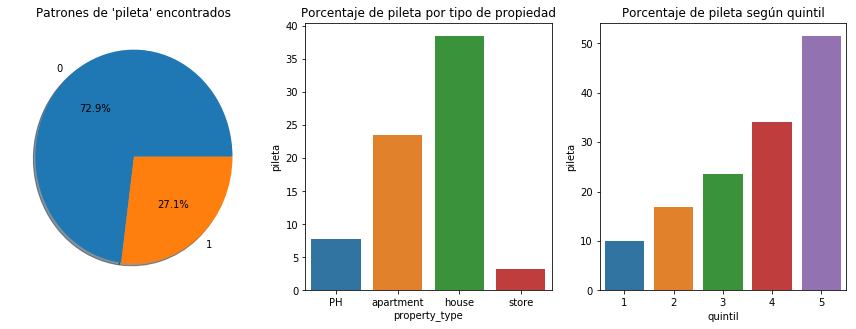

In [4]:
##Pileta
regex_pileta = re.compile("pileta|picina|piscina|pisina")
data['pileta'] = data['description'].apply(lambda x: 0 if regex_pileta.search(x)==None else 1)
chart_type('pileta')

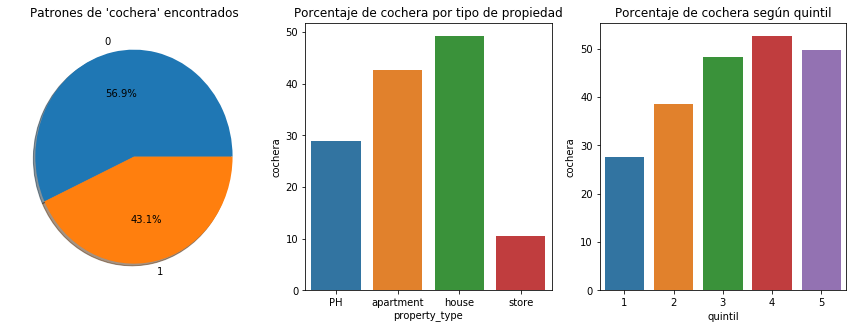

In [5]:
##Cochera
regex_cochera = re.compile("cochera|garage|auto\s|automovil|vehiculo|\scoche\s|\scoches\s")
data['cochera'] = data['description'].apply(lambda x: 0 if regex_cochera.search(x)==None else 1)
chart_type('cochera')

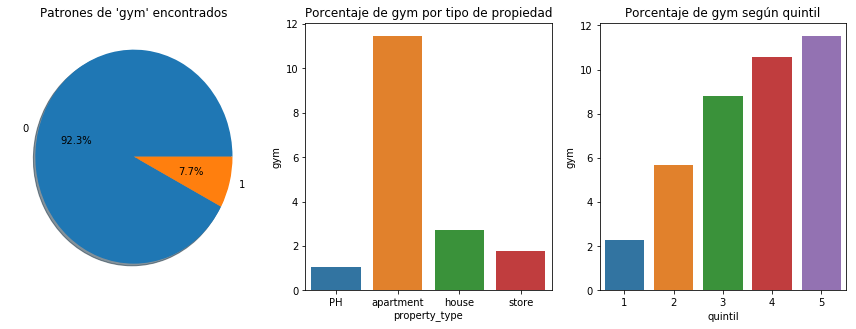

In [6]:
##Gym
regex_gym = re.compile("gym|gimnasio|gimnacio")
data['gym'] = data['description'].apply(lambda x: 0 if regex_gym.search(x)==None else 1)
chart_type('gym')

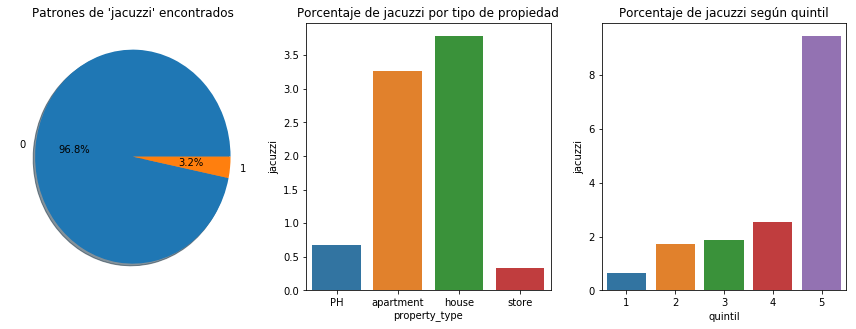

In [7]:
#Jacuzzi
regex_jacuzzi = re.compile("jacuzzi|suana|jacuzi")
data['jacuzzi'] = data['description'].apply(lambda x: 0 if regex_jacuzzi.search(x)==None else 1)
chart_type('jacuzzi')

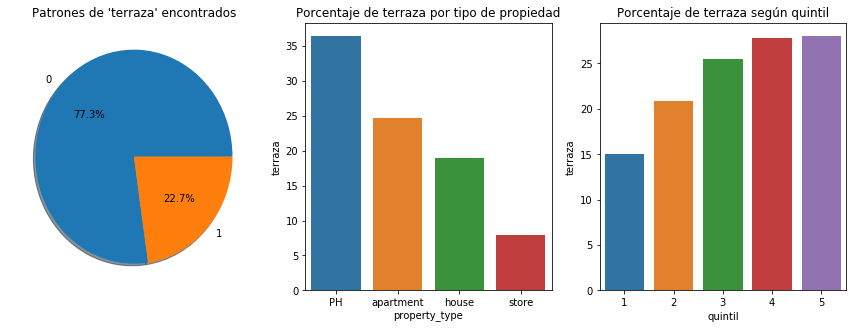

In [8]:
#Terraza
regex_terraza = re.compile("terraza|terrasa")
data['terraza'] = data['description'].apply(lambda x: 0 if regex_terraza.search(x)==None else 1)
chart_type('terraza')

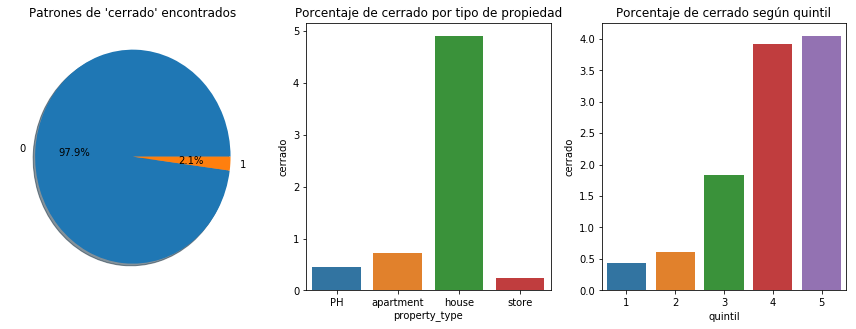

In [9]:
#Barrio cerrado
regex_barrioCerrado = re.compile("(barrio cerrado)|(barrio semicerrado)|(barrio semi cerrado)|country")
data['cerrado'] = data['description'].apply(lambda x: 0 if regex_barrioCerrado.search(x)==None else 1)
chart_type('cerrado')

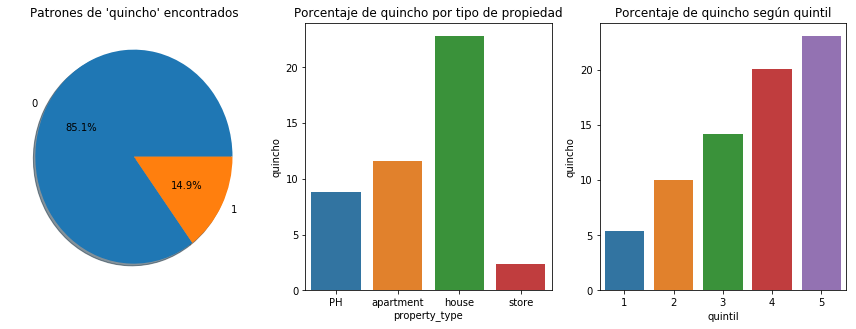

In [14]:
#Quincho
regex_quincho = re.compile("quincho|kincho|qincho|\ssum\s|s\.u\.m\.")
data['quincho'] = data['description'].apply(lambda x: 0 if regex_quincho.search(x)==None else 1)
chart_type('quincho')

In [11]:
#Tipo de departamento (frente, contrafrente, interno, sin información)

# Patterns
regex_frente = re.compile("(a la calle)|(al frente)|(piso frente)|(hacia el frente)|(monoambiente frente)|(orientación frente)|\
                       (frente balcon)|(frente balcón)|(balcón frente)|(balcon frente)|(a frente)")
regex_contraFrente= re.compile("contrafrente|(contra frente)|(contra-frente)|contrfrente|contrafrent|cntrafrente|contr frente")
regex_interno= re.compile("piso interno|depto interno|dpto interno|departamento interno|monoambiente interno")

#Buscamos información en la descripción
maskApartment = data['property_type']=="apartment"
data.loc[maskApartment, 'tipo_dpto'] = data.loc[maskApartment, 'description'].apply(lambda x:  "frente" if regex_frente.search(x)!=None  else
                                                                                    ("contrafrente" if regex_contraFrente.search(x)!=None  else
                                                                                    ("interno" if regex_interno.search(x)!=None else
                                                                                    "sin informacion"
                                                                                    )))
#Buscamos información en el título
maskApartmentSinInformacion =  data['tipo_dpto']=="sin informacion"
data.loc[maskApartmentSinInformacion, 'tipo_dpto'] = data.loc[maskApartment, 'title'].apply(lambda x:  "frente" if regex_frente.search(x)!=None  else
                                                                                    ("contrafrente" if regex_contraFrente.search(x)!=None  else
                                                                                    ("interno" if regex_interno.search(x)!=None else
                                                                                    "sin informacion"
                                                                                    )))

Text(0.5,1,"Patrones de 'tipo_dpto' encontrados")

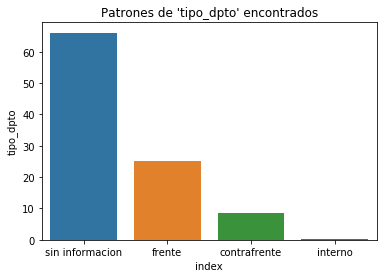

In [12]:
#Resultado - Tipo departamento
chart_tipo_dpto = round((data['tipo_dpto'].value_counts()/data.loc[maskApartment,:].shape[0])*100,2)
chart_tipo_dpto =chart_tipo_dpto.reset_index()
sns.barplot(x='index', y='tipo_dpto', data=chart_tipo_dpto)
plt.title("Patrones de 'tipo_dpto' encontrados")

1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

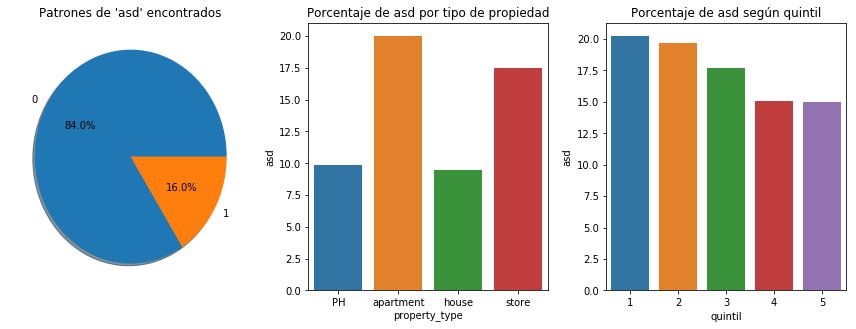

In [19]:
#Barrio cerrado
regex_barrioCerrado = re.compile("\$")
data['asd'] = data['description'].apply(lambda x: 0 if regex_barrioCerrado.search(x)==None else 1)
chart_type('asd')
data.loc[data['asd']==1, 'description']